source: https://www.youtube.com/watch?v=1UqCjFQiiy0&list=PLJV_el3uVTsPy9oCRY30oBPNLCo89yu49&index=4


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
a = 1
b = 10
x = -a *b

x

-10

In [8]:
x_data = [338., 333., 328., 207., 226., 25., 179., 60., 208., 606.]
y_data = [640., 633., 619., 393., 428., 27., 193., 66., 226., 1591.]

#y_data = b + w * x_data

In [9]:
#random generate bias and weight 
#compute average error for each pair

x = np.arange(-200, -100, 1)  #bias
y = np.arange(-5, 5, 0.1)     #weight
z = np.zeros((len(x), len(y)))


X, Y = np.meshgrid(x, y)    

#print(f'X = {X}')
#print(f'Y = {Y}')

for i in range(len(x)):     #200
    for j in range(len(y)): #50 
        b = x[i]           #assgin bias
        w = y[j]           #assgin weight  
        z[j][i] = 0        
        for n in range(len(x_data)):
            #use Loss function to compute error
            z[j][i] = z[j][i] + (y_data[n] - b - w*x_data[n]) ** 2 
            
        #average
        z[j][i] = z[j][i]/len(x_data)
        

In [17]:
#ydata = b + w * xdata
b = -120       #initial b
w = -4         #initial w
lr = 1      #learning rate
iteration = int(1e+5)

#Store initial values for plotting
b_history = [b]
w_history = [w]

lr_b = 0
lr_w = 0

# Iterations
for i in range(iteration):
    
    b_grad = 0.0
    w_grad = 0.0
    #sum of gradient
    for j in range(len(x_data)):
        b_grad = b_grad - 2 * (y_data[j] - b - w*x_data[j]) * (1)
        w_grad = w_grad - 2 * (y_data[j] - b - w*x_data[j]) * (x_data[j])
    
    
    lr_b = lr_b + b_grad ** 2
    lr_w = lr_w + w_grad ** 2
    
    #Update parameters
    b = b - lr/np.sqrt(lr_b) * b_grad
    w = w - lr/np.sqrt(lr_w) * w_grad
    
    #store parameters for plotting
    b_history.append(b)
    w_history.append(w)


print(b_history[-1])
print(w_history[-1])

-188.3668387495323
2.6692640713379903


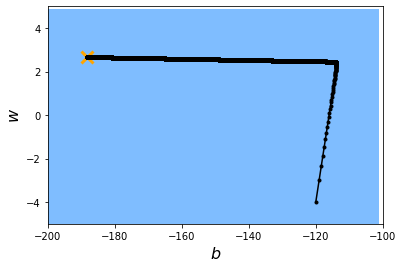

In [11]:
#plot the figure

plt.contourf(x,y,Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))    
plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show()